## Covid Effect on Bengaluru Air Pollution

This notebook is mainly a test bed for this project. Subsequent notebooks will be properly formatted and organized

AQI Data has been obtained from: https://www.kaggle.com/rohanrao/air-quality-data-in-india (2015 - 2020)

More data to be obtained from: https://cpcb.nic.in/

The aim of this exercise is to study the effects of covid related lockdowns on air pollution levels of Bengaluru

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../Data/city_day.csv')
data.head(20)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


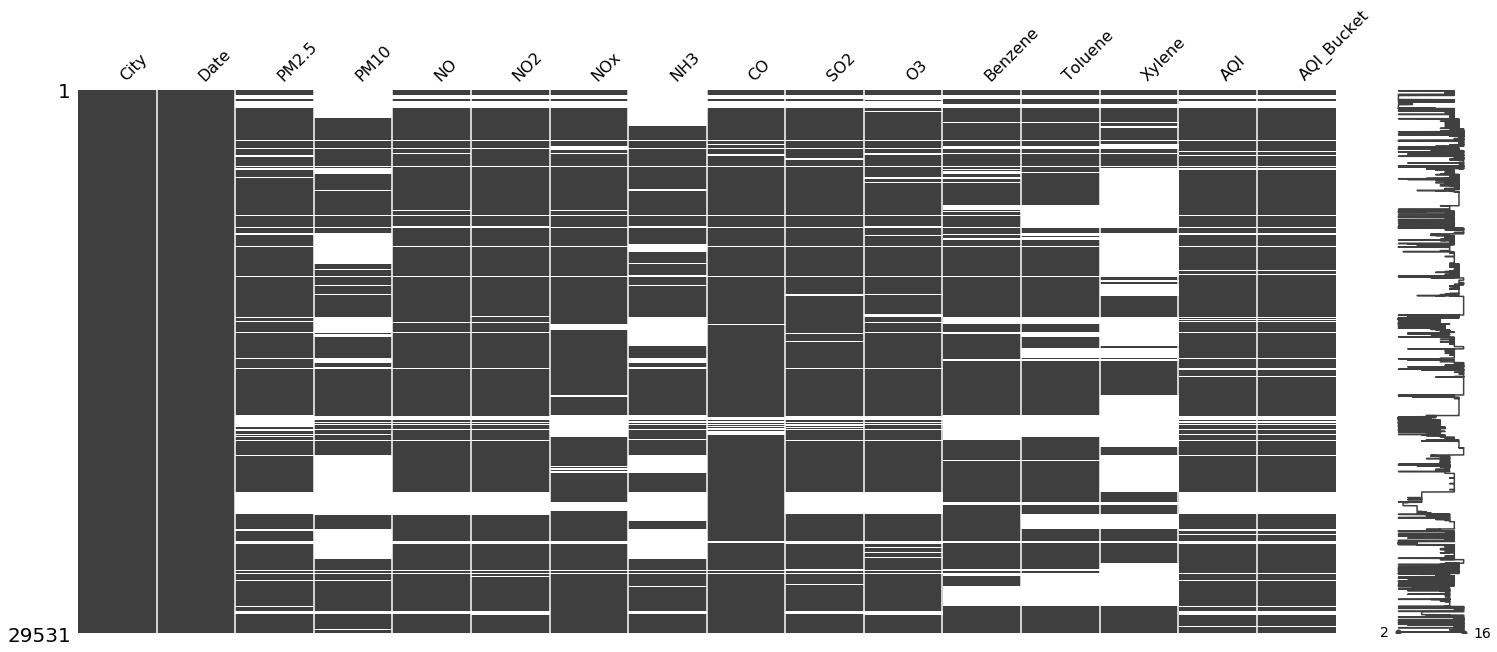

In [3]:
mns.matrix(data)

In [4]:
data['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [5]:
blr_df = data[data['City'] == 'Bengaluru']
blr_df.head(20)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
4294,Bengaluru,2015-01-01,NaN,NaN,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,NaN,NaN,NaN
4295,Bengaluru,2015-01-02,NaN,NaN,6.05,19.73,14.14,23.74,1.35,3.97,22.77,0.65,5.31,NaN,NaN,NaN
4296,Bengaluru,2015-01-03,NaN,NaN,11.91,19.88,20.72,4.32,17.40,13.61,12.03,0.53,19.25,NaN,NaN,NaN
4297,Bengaluru,2015-01-04,NaN,NaN,7.45,21.61,16.88,0.87,5.05,6.52,17.70,0.55,7.47,NaN,NaN,NaN
4298,Bengaluru,2015-01-05,NaN,NaN,9.52,22.17,21.76,31.38,1.83,4.71,12.72,0.40,4.36,NaN,NaN,NaN
4299,Bengaluru,2015-01-06,NaN,NaN,6.60,23.20,16.24,26.35,0.52,4.42,13.82,22.68,4.11,NaN,NaN,NaN
4300,Bengaluru,2015-01-07,NaN,NaN,22.60,28.66,30.84,22.73,1.46,5.13,16.98,34.66,8.65,NaN,NaN,NaN
4301,Bengaluru,2015-01-08,NaN,NaN,7.50,31.10,21.16,38.67,2.30,7.07,17.35,31.00,8.60,NaN,NaN,NaN
4302,Bengaluru,2015-01-09,NaN,NaN,6.75,25.98,15.03,23.48,0.54,12.84,16.27,30.51,8.44,NaN,NaN,NaN
4303,Bengaluru,2015-01-10,NaN,NaN,3.38,29.23,16.76,34.17,1.69,3.08,25.01,36.42,13.41,NaN,NaN,NaN


In [6]:
blr_df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
6298,Bengaluru,2020-06-27,16.60,29.48,3.06,13.68,13.07,6.88,0.67,7.29,15.69,0.21,1.18,NaN,51.0,Satisfactory
6299,Bengaluru,2020-06-28,20.44,26.34,2.69,10.33,10.58,6.58,0.66,6.60,17.59,0.12,0.94,NaN,61.0,Satisfactory
6300,Bengaluru,2020-06-29,28.68,29.27,3.62,12.12,12.94,6.80,0.56,6.33,16.99,0.17,1.17,NaN,65.0,Satisfactory
6301,Bengaluru,2020-06-30,14.47,24.26,4.61,12.69,15.00,6.82,0.56,6.45,16.08,0.18,0.86,NaN,63.0,Satisfactory
6302,Bengaluru,2020-07-01,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40,0.27,0.65,NaN,43.0,Good


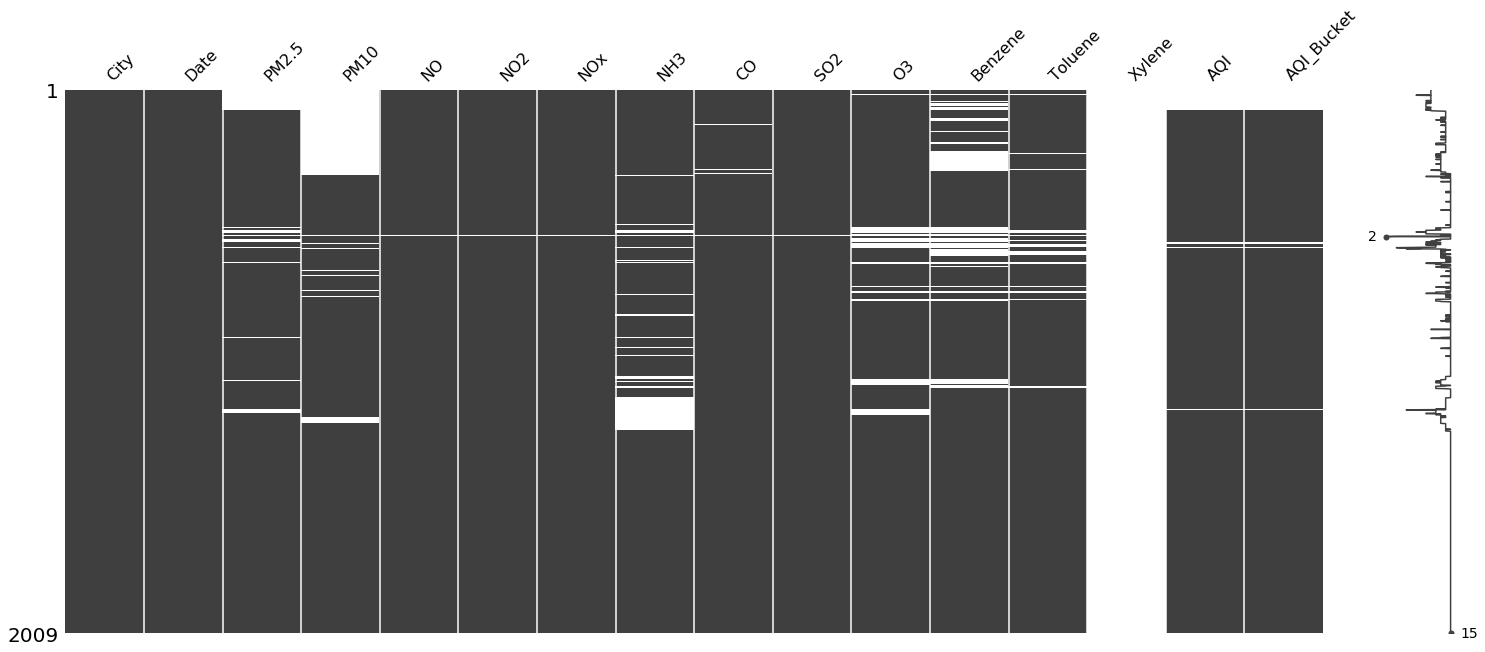

In [7]:
mns.matrix(blr_df)

In [8]:
blr_df.shape

(2009, 16)

In [9]:
blr_df.isnull().sum()

City             0
Date             0
PM2.5          146
PM10           360
NO               6
NO2              6
NOx              4
NH3            203
CO              11
SO2              6
O3             144
Benzene        266
Toluene         93
Xylene        2009
AQI             99
AQI_Bucket      99
dtype: int64

In [13]:
pm_df = blr_df[blr_df.PM10 < 20.0]
pm_df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
4613,Bengaluru,2015-11-16,16.03,16.77,3.81,18.34,18.74,NaN,1.61,2.31,35.48,0.87,1.26,NaN,91.0,Satisfactory
4614,Bengaluru,2015-11-17,NaN,8.22,4.89,16.20,20.54,NaN,1.60,2.49,NaN,NaN,NaN,NaN,116.0,Moderate
4615,Bengaluru,2015-11-18,19.32,16.42,4.57,15.47,18.77,25.00,1.99,2.75,NaN,NaN,1.15,NaN,126.0,Moderate
4619,Bengaluru,2015-11-22,16.97,15.69,3.07,10.57,12.60,13.92,0.83,2.60,NaN,NaN,1.06,NaN,61.0,Satisfactory
4808,Bengaluru,2016-05-29,NaN,19.21,1.69,7.30,4.90,17.98,0.49,2.55,NaN,NaN,1.19,NaN,27.0,Good
4818,Bengaluru,2016-06-08,NaN,19.38,2.25,9.28,5.99,NaN,0.34,2.24,NaN,NaN,NaN,NaN,20.0,Good
4820,Bengaluru,2016-06-10,NaN,19.97,2.30,10.05,6.41,NaN,0.37,2.28,NaN,NaN,NaN,NaN,20.0,Good
4833,Bengaluru,2016-06-23,19.00,15.46,3.39,16.91,9.84,32.35,1.61,1.90,53.33,1.11,2.73,NaN,143.0,Moderate
4839,Bengaluru,2016-06-29,115.98,17.10,8.59,24.19,19.33,44.18,2.48,1.58,39.09,0.97,2.58,NaN,174.0,Moderate
4842,Bengaluru,2016-07-02,31.80,9.93,3.27,15.96,10.19,35.09,6.28,1.10,51.84,0.79,2.05,NaN,192.0,Moderate


In [14]:
pm_df.shape

(16, 16)

In [15]:
def print_rows(x):
    print(x)

In [16]:
pm_df['PM10'].apply(print_rows)

16.77
8.22
16.42
15.69
19.21
19.38
19.97
15.46
17.1
9.93
18.46
13.98
11.73
19.23
19.43
19.34


4613    None
4614    None
4615    None
4619    None
4808    None
4818    None
4820    None
4833    None
4839    None
4842    None
4890    None
4891    None
4892    None
5359    None
6273    None
6274    None
Name: PM10, dtype: object

In [17]:
blr_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,1863.000000,1649.000000,2003.000000,2003.000000,2005.000000,1806.000000,1998.000000,2003.000000,1865.000000,1743.000000,1916.000000,0.0,1910.000000
mean,35.819828,83.243287,9.409136,27.995042,19.717092,21.977176,1.838634,5.519021,32.868086,3.222553,4.753194,NaN,94.318325
std,22.073252,38.105868,7.470543,13.286276,15.082800,12.739766,3.970001,4.185759,18.404404,16.323820,16.023034,NaN,39.914934
min,1.720000,8.220000,0.460000,3.000000,0.000000,0.150000,0.000000,0.730000,1.830000,0.000000,0.000000,NaN,20.000000
25%,21.295000,56.410000,5.000000,18.790000,8.450000,13.940000,0.720000,3.740000,17.840000,0.430000,1.147500,NaN,67.000000
50%,30.920000,77.360000,7.520000,26.920000,19.140000,19.635000,0.920000,5.030000,30.600000,0.810000,1.790000,NaN,86.000000
75%,44.250000,103.850000,11.695000,34.175000,28.570000,26.460000,1.160000,6.460000,45.420000,1.575000,3.100000,NaN,111.000000
max,313.590000,351.510000,95.190000,142.350000,147.060000,120.070000,48.070000,92.660000,157.200000,307.420000,411.520000,NaN,352.000000


In [18]:
blr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 4294 to 6302
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2009 non-null   object 
 1   Date        2009 non-null   object 
 2   PM2.5       1863 non-null   float64
 3   PM10        1649 non-null   float64
 4   NO          2003 non-null   float64
 5   NO2         2003 non-null   float64
 6   NOx         2005 non-null   float64
 7   NH3         1806 non-null   float64
 8   CO          1998 non-null   float64
 9   SO2         2003 non-null   float64
 10  O3          1865 non-null   float64
 11  Benzene     1743 non-null   float64
 12  Toluene     1916 non-null   float64
 13  Xylene      0 non-null      float64
 14  AQI         1910 non-null   float64
 15  AQI_Bucket  1910 non-null   object 
dtypes: float64(13), object(3)
memory usage: 266.8+ KB
